In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from xgboost import XGBClassifier

In [2]:
file_path = r"C:\Users\supri\Downloads\diabetes_prediction_dataset - diabetes_prediction_dataset.csv"
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [4]:
from sklearn import set_config
import matplotlib.pyplot as plt

set_config(display="diagram")

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['gender', 'smoking_history'], dtype='object'))])

In [5]:
df_processed = preprocessor.fit_transform(df)

df_processed.shape

(100000, 16)

In [7]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [8]:
target_column = "diabetes"
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 8), (20000, 8), (80000,), (20000,))

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),  
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [11]:
print(X_train.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

num_cols = [col for col in num_cols if col in X_train.columns]
cat_cols = [col for col in cat_cols if col in X_train.columns]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

full_pipeline.fit(X_train, y_train)

y_pred = full_pipeline.predict(X_test)

In [14]:
print(preprocessor.transformers)
print(X_train.columns)

[('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']), ('cat', OneHotEncoder(handle_unknown='ignore'), ['gender', 'hypertension', 'heart_disease', 'smoking_history'])]
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


In [15]:
X_train_transformed = preprocessor.fit_transform(X_train)
print(X_train_transformed.shape)

(80000, 17)


In [16]:
print(y_train.head())
print(y_train.dtype)
print(y_train.unique()) 


74736    1
36589    0
37414    0
71251    0
40454    0
Name: diabetes, dtype: int64
int64
[1 0]


In [18]:
X_train_transformed = preprocessor.fit_transform(X_train)

import numpy as np
X_train_transformed = np.array(X_train_transformed)

print(X_train_transformed.shape)

(80000, 17)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

full_pipeline.fit(X_train, y_train)

y_pred = full_pipeline.predict(X_test)

In [20]:
import pandas as pd

column_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(X_train_transformed, columns=column_names)

print(X_train_df.head())

   num__age  num__bmi  num__HbA1c_level  num__blood_glucose_level  \
0  1.691070  0.000472          0.908249                  0.170207   
1 -1.016460 -0.321772         -0.959680                 -0.297058   
2 -0.261902 -0.205824          1.001645                  1.522815   
3 -0.306288 -0.585289          0.441267                  0.514507   
4 -0.528217 -0.707259         -0.492698                 -1.182401   

   cat__gender_Female  cat__gender_Male  cat__gender_Other  \
0                 1.0               0.0                0.0   
1                 1.0               0.0                0.0   
2                 1.0               0.0                0.0   
3                 1.0               0.0                0.0   
4                 1.0               0.0                0.0   

   cat__hypertension_0  cat__hypertension_1  cat__heart_disease_0  \
0                  0.0                  1.0                   1.0   
1                  1.0                  0.0                   1.0   
2    

In [21]:
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed = np.array(X_test_transformed)

In [22]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'smoking_history'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
y_pred = full_pipeline.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



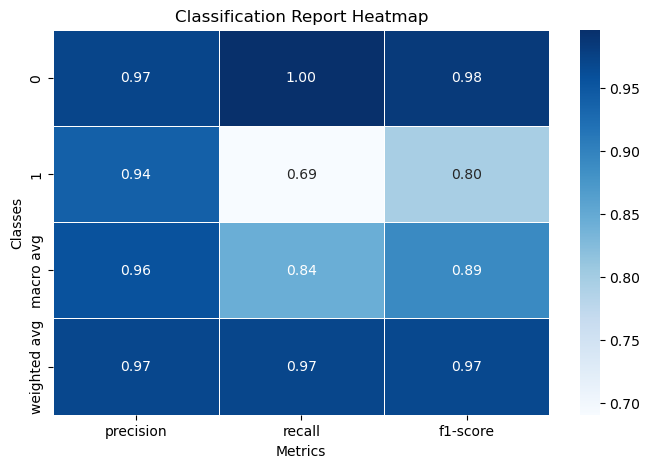

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).T

report_df = report_df.drop(['accuracy'], errors='ignore')

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")

plt.show()

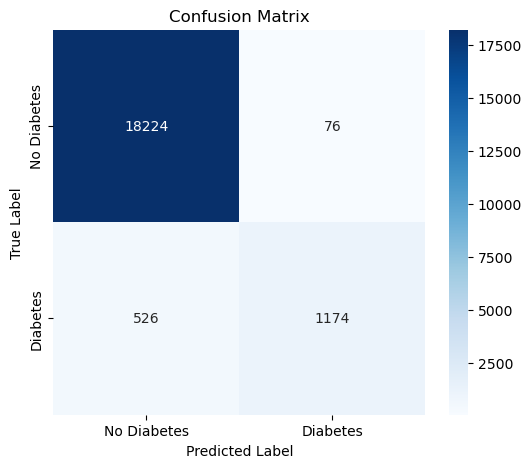

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['gender', 'smoking_history']:  
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  
    label_encoders[col] = le

In [30]:
X_train = pd.get_dummies(X_train, columns=['gender', 'smoking_history'])
X_test = pd.get_dummies(X_test, columns=['gender', 'smoking_history'])

In [31]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss")  
xgb_clf.fit(X_train, y_train)

C:\Users\supri\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:01:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)